In [1]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *
from numpy.random import randint
import matplotlib.pyplot as plt
import os, glob
import pandas as pd
from configs import *
from sklearn.model_selection import train_test_split
from utils_train import *
from sklearn.preprocessing import LabelEncoder

In [2]:
d = DatasetConfiguration(names=['tmp'])
d.select_all()
d.read()

Dataset - tmp - exists: True


In [3]:
z = make_df_parallel(names=d.fnames.tolist(), setting='raw')

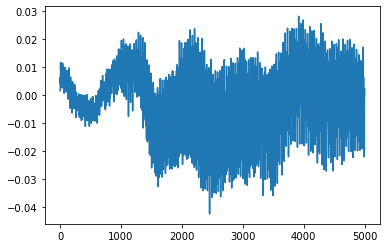

In [4]:
z.iloc[0,:].plot()

['F200904', '224207', '006', 'G', '050', 'T', '25.2', 'H', '81.9']

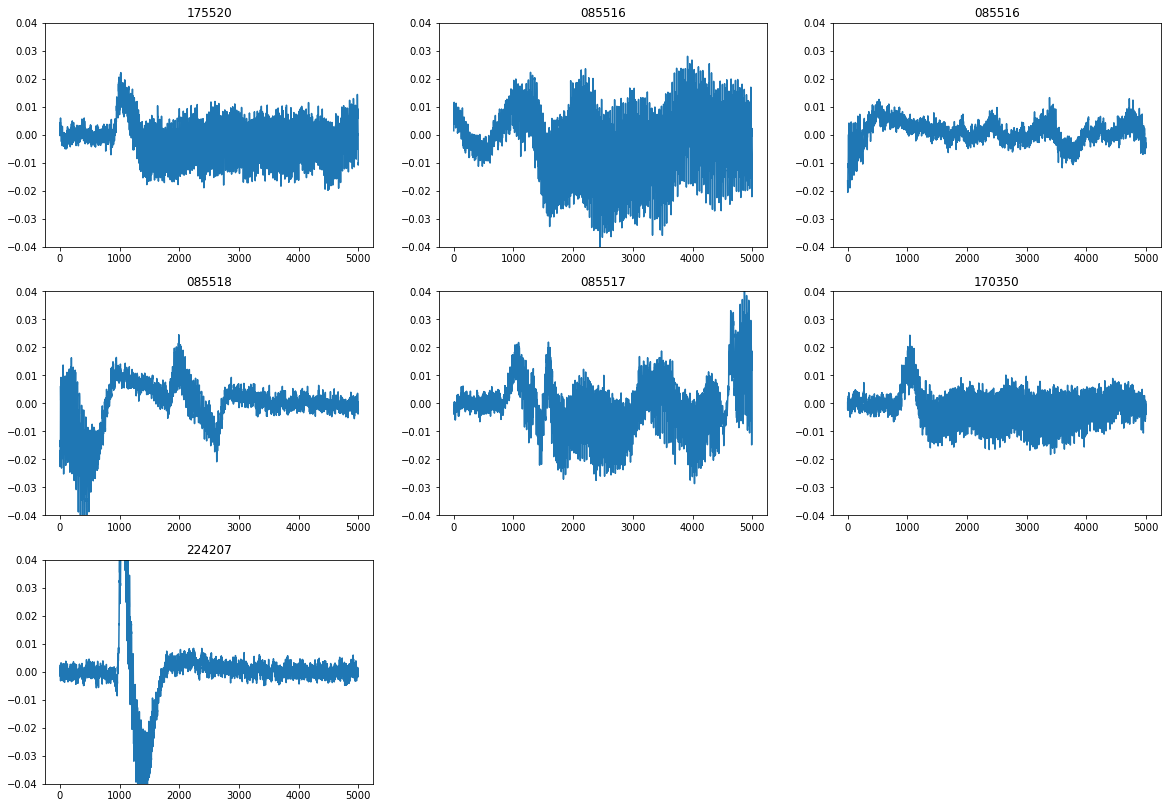

In [18]:
plt.figure(figsize=(20,14))
for i in range(7):
    plt.subplot(3,3,i+1)
    z.iloc[i-1,:].plot()
    plt.ylim(-.04,.04)
    plt.title(z.iloc[i-1,:].name.split('_')[1])

In [5]:
def read_simple(paths):
    """
    Function to read wav files into a numpy array given their paths.
    It also returns their names for verification purposes.
    """
    import soundfile as sf
    data = []
    names = []
    for _, wavname in enumerate(paths):
        wavdata, _ = sf.read(wavname)
        data.append(wavdata)
        names.append(wavname)
    datamatrix = np.asarray(data)
    return datamatrix, names

In [6]:
read_simple(d.fnames.tolist())[0].shape

(7, 5000)

In [2]:
data = Dataset('Wingbeats')
data.read(data='Ae. aegypti',loadmat=True, setting='psd_dB')

Species: Ae. aegypti.
Read 85553 filenames in 1.90 seconds.
Loaded data into matrix in 24.78 seconds.


In [3]:
data.clean(threshold=20, threshold_interf=50)

52117 filenames after cleaning.


In [4]:
data.make_array(setting='raw');

2693


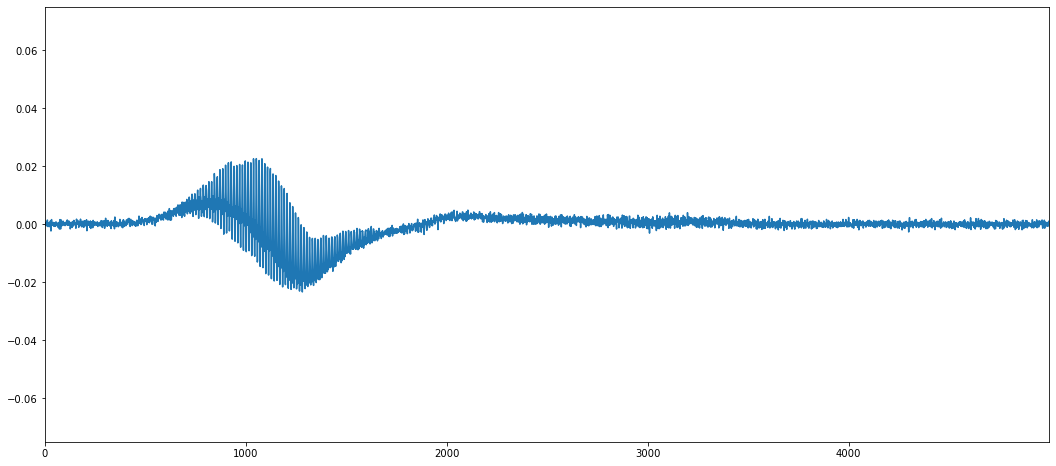

In [171]:
rdm = randint(0,data.raw.shape[0])
data.raw.iloc[rdm,:].plot(ylim=(-0.075,.075), figsize=(18,8))
print(rdm)

In [174]:
%matplotlib widget
rdm = 2693#11284

data.X.iloc[rdm,:].plot(figsize=(18,10), fontsize=16)
plt.savefig('/home/kalfasyan/Desktop/b_psd.eps', format='eps')#, facecolor='w', edgecolor='w')

plt.figure(figsize=(18,10))
sig = read_simple([data.filenames.iloc[rdm]])[0]
plt.plot(sig.T)
plt.ylim(-0.05,.05)

plt.savefig('/home/kalfasyan/Desktop/a_raw.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [175]:
df = make_df_parallel(names=data.filenames.tolist(), setting='spectrograms')
M = df.iloc[rdm,:].values.reshape(129,120)
plt.figure(figsize=(28,16))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.imshow(M)
plt.savefig('/home/kalfasyan/Desktop/c_spectrogram.eps', format='eps')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …